In [2]:
import numpy as np
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [7]:
X.shape, y.shape

((442, 10), (442,))

### SK learn pre-built function

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968

In [14]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [16]:
reg.intercept_

np.float64(151.88331005254167)

### Creating my own Multiple Regression Model

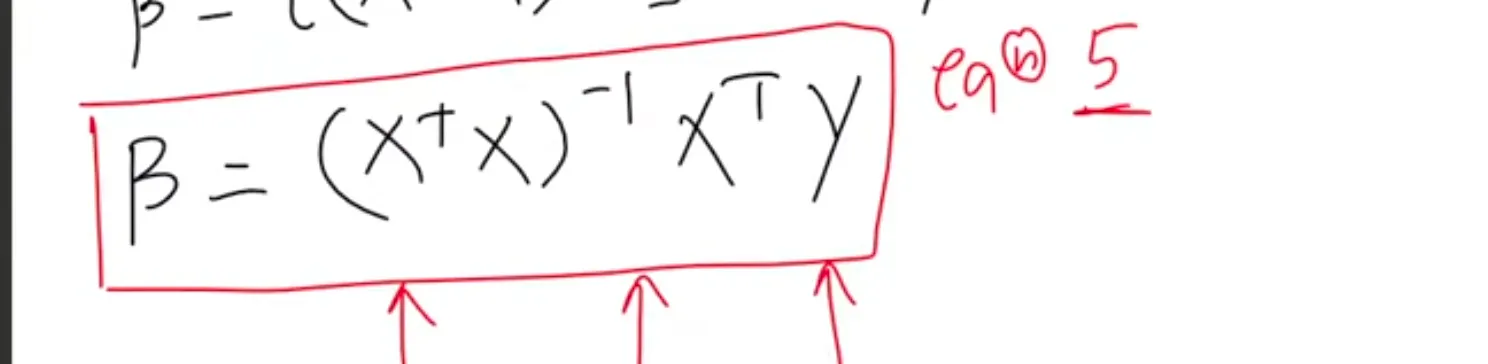

In [21]:
class MeroLR:
  def _init_(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    # calcuate the coeffs
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test, self.coef_) + self.intercept_
    return y_pred

In [22]:
lr = MeroLR()

In [23]:
lr.fit(X_train,y_train)

In [25]:
X_train.shape

(353, 10)

In [28]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [29]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.43993386615689634

In [30]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [31]:
lr.intercept_

np.float64(151.88331005254165)

### Let's use gradient descent approach with sklearn.

In [32]:
from sklearn.linear_model import SGDRegressor

In [33]:
sdg = SGDRegressor()
sdg.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor()

In [34]:
y_pred = reg.predict(X_test)

In [35]:
r2_score(y_test,y_pred)

0.4399338661568968

In [36]:
sdg.coef_

array([  61.30232023,  -22.52437078,  254.69842415,  186.83864704,
         39.94252835,   11.87929033, -140.33826793,  122.13459456,
        237.33366207,  116.94769512])

In [38]:
sdg.intercept_

array([-0.00050922])